In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [108]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,M,metodo,tiempo
0,peor-caso-bt,1,1,BT,11.721553
1,peor-caso-bt,2,2,BT,12.632882
2,peor-caso-bt,3,3,BT,8.245877
3,peor-caso-bt,4,4,BT,10.227497
4,peor-caso-bt,5,5,BT,8.503242
...,...,...,...,...,...
259,dinamica,1400,1000,DP,413.780640
260,dinamica,1400,1100,DP,452.407048
261,dinamica,1400,1200,DP,497.298083
262,dinamica,1400,1300,DP,528.602764


In [26]:
df_resultados[df_resultados["metodo"] == "BT"]

,dataset,n,M,metodo,tiempo
0,poda-fact-bt,1,3,BT,8.582693
1,poda-fact-bt,2,6,BT,12.765814
2,poda-fact-bt,3,9,BT,14.559101
3,poda-fact-bt,4,12,BT,11.837063
4,poda-fact-bt,5,15,BT,9.469350
...,...,...,...,...,...
112,peor-caso-bt,35,35,BT,613.309788
113,peor-caso-bt,36,36,BT,884.947896
114,peor-caso-bt,37,37,BT,1437.461192
115,peor-caso-bt,38,38,BT,2240.914956


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

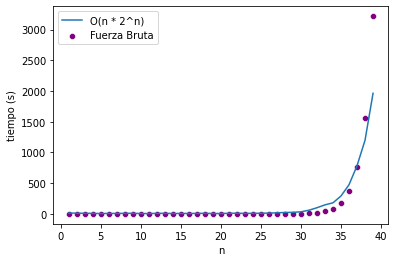

In [24]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="BF")].copy();
df_complejidad_FB["tiempo_esperado"] = df_complejidad_FB["n"] * 2.0 ** df_complejidad_FB["n"] * 0.00000000015; # Exponencial
fig = sns.lineplot(data=df_complejidad_FB,x='n', y='tiempo');
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="purple");
fig.set(xlabel='n', ylabel='tiempo (s)');
fig.legend(labels=['O(n * 2^n)','Fuerza Bruta']);
plt.savefig("graficos/df_bf_funcion.png");

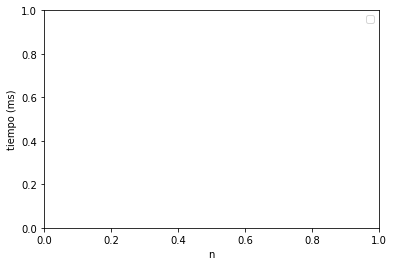

In [6]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.000015; # Exponencial
# fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: nan


/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/dell/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


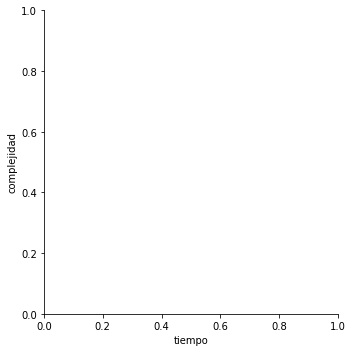

In [7]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

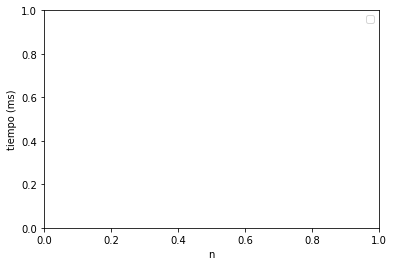

In [8]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: nan


/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/dell/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


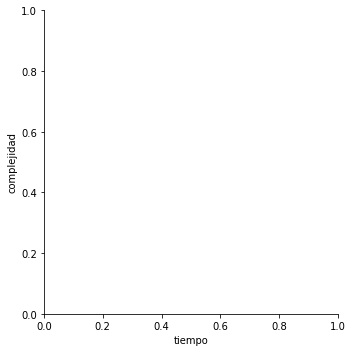

In [9]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

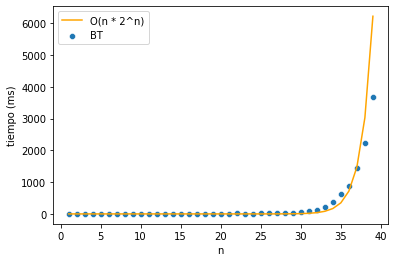

In [59]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = df_BT_peor_caso["n"] * 2 ** df_BT_peor_caso["n"] * 0.00000000029; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n * 2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: nan


/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/dell/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dell/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


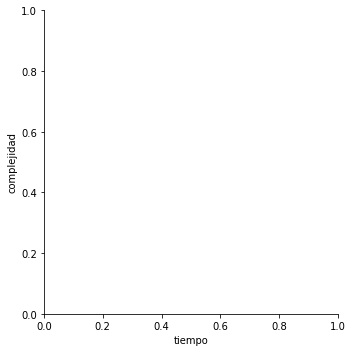

In [11]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

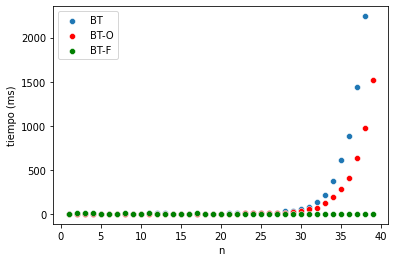

In [65]:
df_BT_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt"))].copy();
df_BT_densidad_alta = df_BT_densidad_alta[df_BT_densidad_alta["tiempo"] < 3500]; # Sacamos outliers.
df_BT_opt = df_resultados[((df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "poda-opt-bt"))].copy();
df_BT_opt = df_BT_opt[df_BT_opt["tiempo"] < 3500]; # Sacamos outliers.
df_BT_fact = df_resultados[((df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "poda-fact-bt"))].copy();
df_BT_fact = df_BT_fact[df_BT_fact["tiempo"] < 3500]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_densidad_alta, x='n', y='tiempo');
fig = sns.scatterplot(data=df_BT_opt, x='n', y='tiempo', color='red');
fig = sns.scatterplot(data=df_BT_fact, x='n', y='tiempo', color='green');
fig.legend(labels=['BT','BT-O', 'BT-F']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

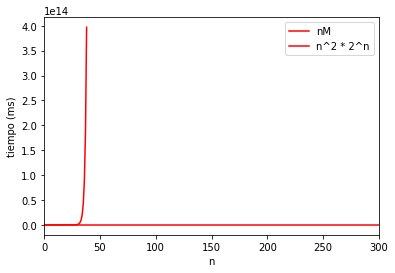

In [110]:
df_BT_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt"))].copy();
df_BT_densidad_alta = df_BT_densidad_alta[df_BT_densidad_alta["tiempo"] < 3500]; # Sacamos outliers.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["tiempo_esperado"] = df_dinamica["n"] * df_dinamica["M"]; # Exponencial.
fig = sns.lineplot(data=df_dinamica, x='n', y='tiempo_esperado', color="red", ci=None);
df_BT_densidad_alta["tiempo_esperado"] = df_BT_densidad_alta["n"]**2 * 2**df_BT_densidad_alta["M"]; # Exponencial.
fig = sns.lineplot(data=df_BT_densidad_alta, x='n', y='tiempo_esperado', color="red", ci=None);

# fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==200], x='M', y='tiempo');
# fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==700], x='M', y='tiempo');
# fig = sns.scatterplot(data=df_BT_densidad_alta, x='n', y='tiempo');
# fig = sns.scatterplot(data=df_BT_opt, x='n', y='tiempo', color='red');
# fig = sns.scatterplot(data=df_BT_fact, x='n', y='tiempo', color='green');
fig.legend(labels=['nM','n^2 * 2^n']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.xlim(0, 300);
plt.savefig("graficos/bt-podas-alta.svg");

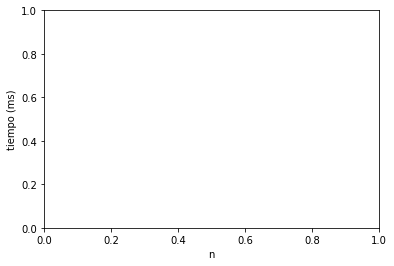

In [13]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_alta[df_BT_densidad_alta["tiempo"]<1], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

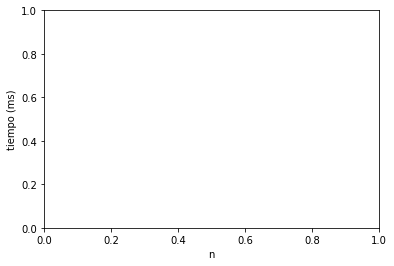

In [14]:
df_BT_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "densidad-baja")].copy();
fig = sns.scatterplot(data=df_BT_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

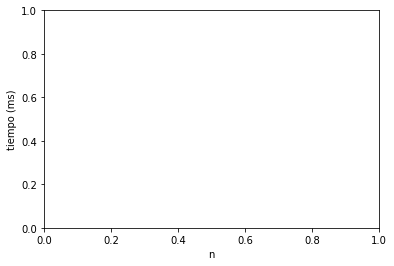

In [15]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_baja[df_BT_densidad_baja["tiempo"]<400], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

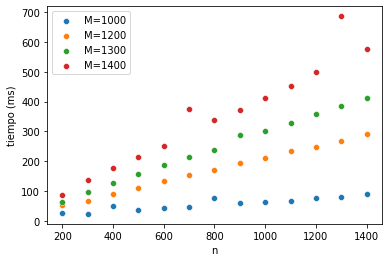

In [69]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==200], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==700], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==1400], x='n', y='tiempo');
fig.legend(labels=['M=1000','M=1200','M=1300','M=1400']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

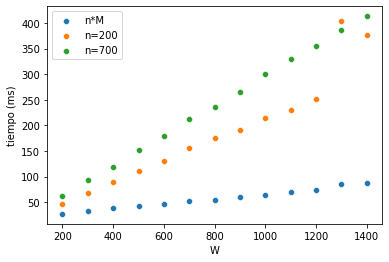

In [93]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["tiempo_esperado"] = df_dinamica["n"] * df_dinamica["M"]; # Exponencial.
# fig = sns.lineplot(data=df_dinamica, x='n', y='tiempo_esperado', color="red", ci=None);

fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==200], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==700], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='M', y='tiempo');

# fig = sns.lineplot(data=df_dinamica["n"])
# fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1400], x='M', y='tiempo');
fig.legend(labels=['n*M','n=200','n=700','n=1000']);
fig.set(xlabel='W', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

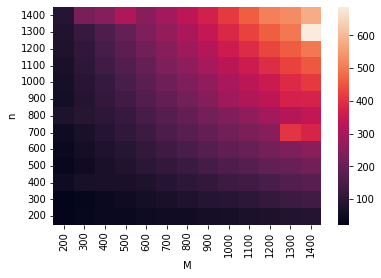

In [73]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

In [ ]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["W"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets densidad-alta y densidad-baja.

In [ ]:
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-alta")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

In [ ]:
df_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-baja")].copy();
df_densidad_baja = df_densidad_baja[df_densidad_baja["n"]<=30];
fig = sns.scatterplot(data=df_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");